This code produces the Figure 3: "Relative errors of damping ratios identified from noisy signals
using different transforms" from the article:

Marko Mihalec, Janko Slavič and Miha Boltežar,
Synchrosqueezed Wavelet Transform for Damping Identification,
Mechanical Systems and Signal Processing (2016),
<a href="http://dx.doi.org/10.1016/j.ymssp.2016.05.005">10.1016/j.ymssp.2016.05.005</a>
or:
<a href="http://lab.fs.uni-lj.si/ladisk/?what=abstract&ID=171">www.ladisk.si</a>

In [11]:
import numpy as np
from dampingid import wt_damping_id
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
A = 1
B = 1.4
w = 20 #[Hz]
zeta = 0.02
t=np.linspace(0,2,600)

In [13]:
xsig = A*np.sin(w*2*np.pi*t)*np.exp(-2*np.pi*w*zeta*t) # generated signal
xnoise = B*(np.random.rand(len(t))-0.5) # generated noise
varsig=np.std(xsig)**2 # variance of signal
varnoise=np.std(xnoise)**2 #variance of noise
SNR = 10*np.log10(varsig/varnoise) # signal to noise ratio
print('SNR = ', SNR)

SNR =  -5.109613845059464


In [14]:
x=xsig+xnoise
WT = wt_damping_id(x,t,np.linspace(15,25,100),5)

In [17]:
CWT = WT.cwt
SWT = WT.swt()
SWTavg = WT.swt_avg()
SWTprop = WT.swt_prop()

Text(-2.9,30,'frequency [Hz]')

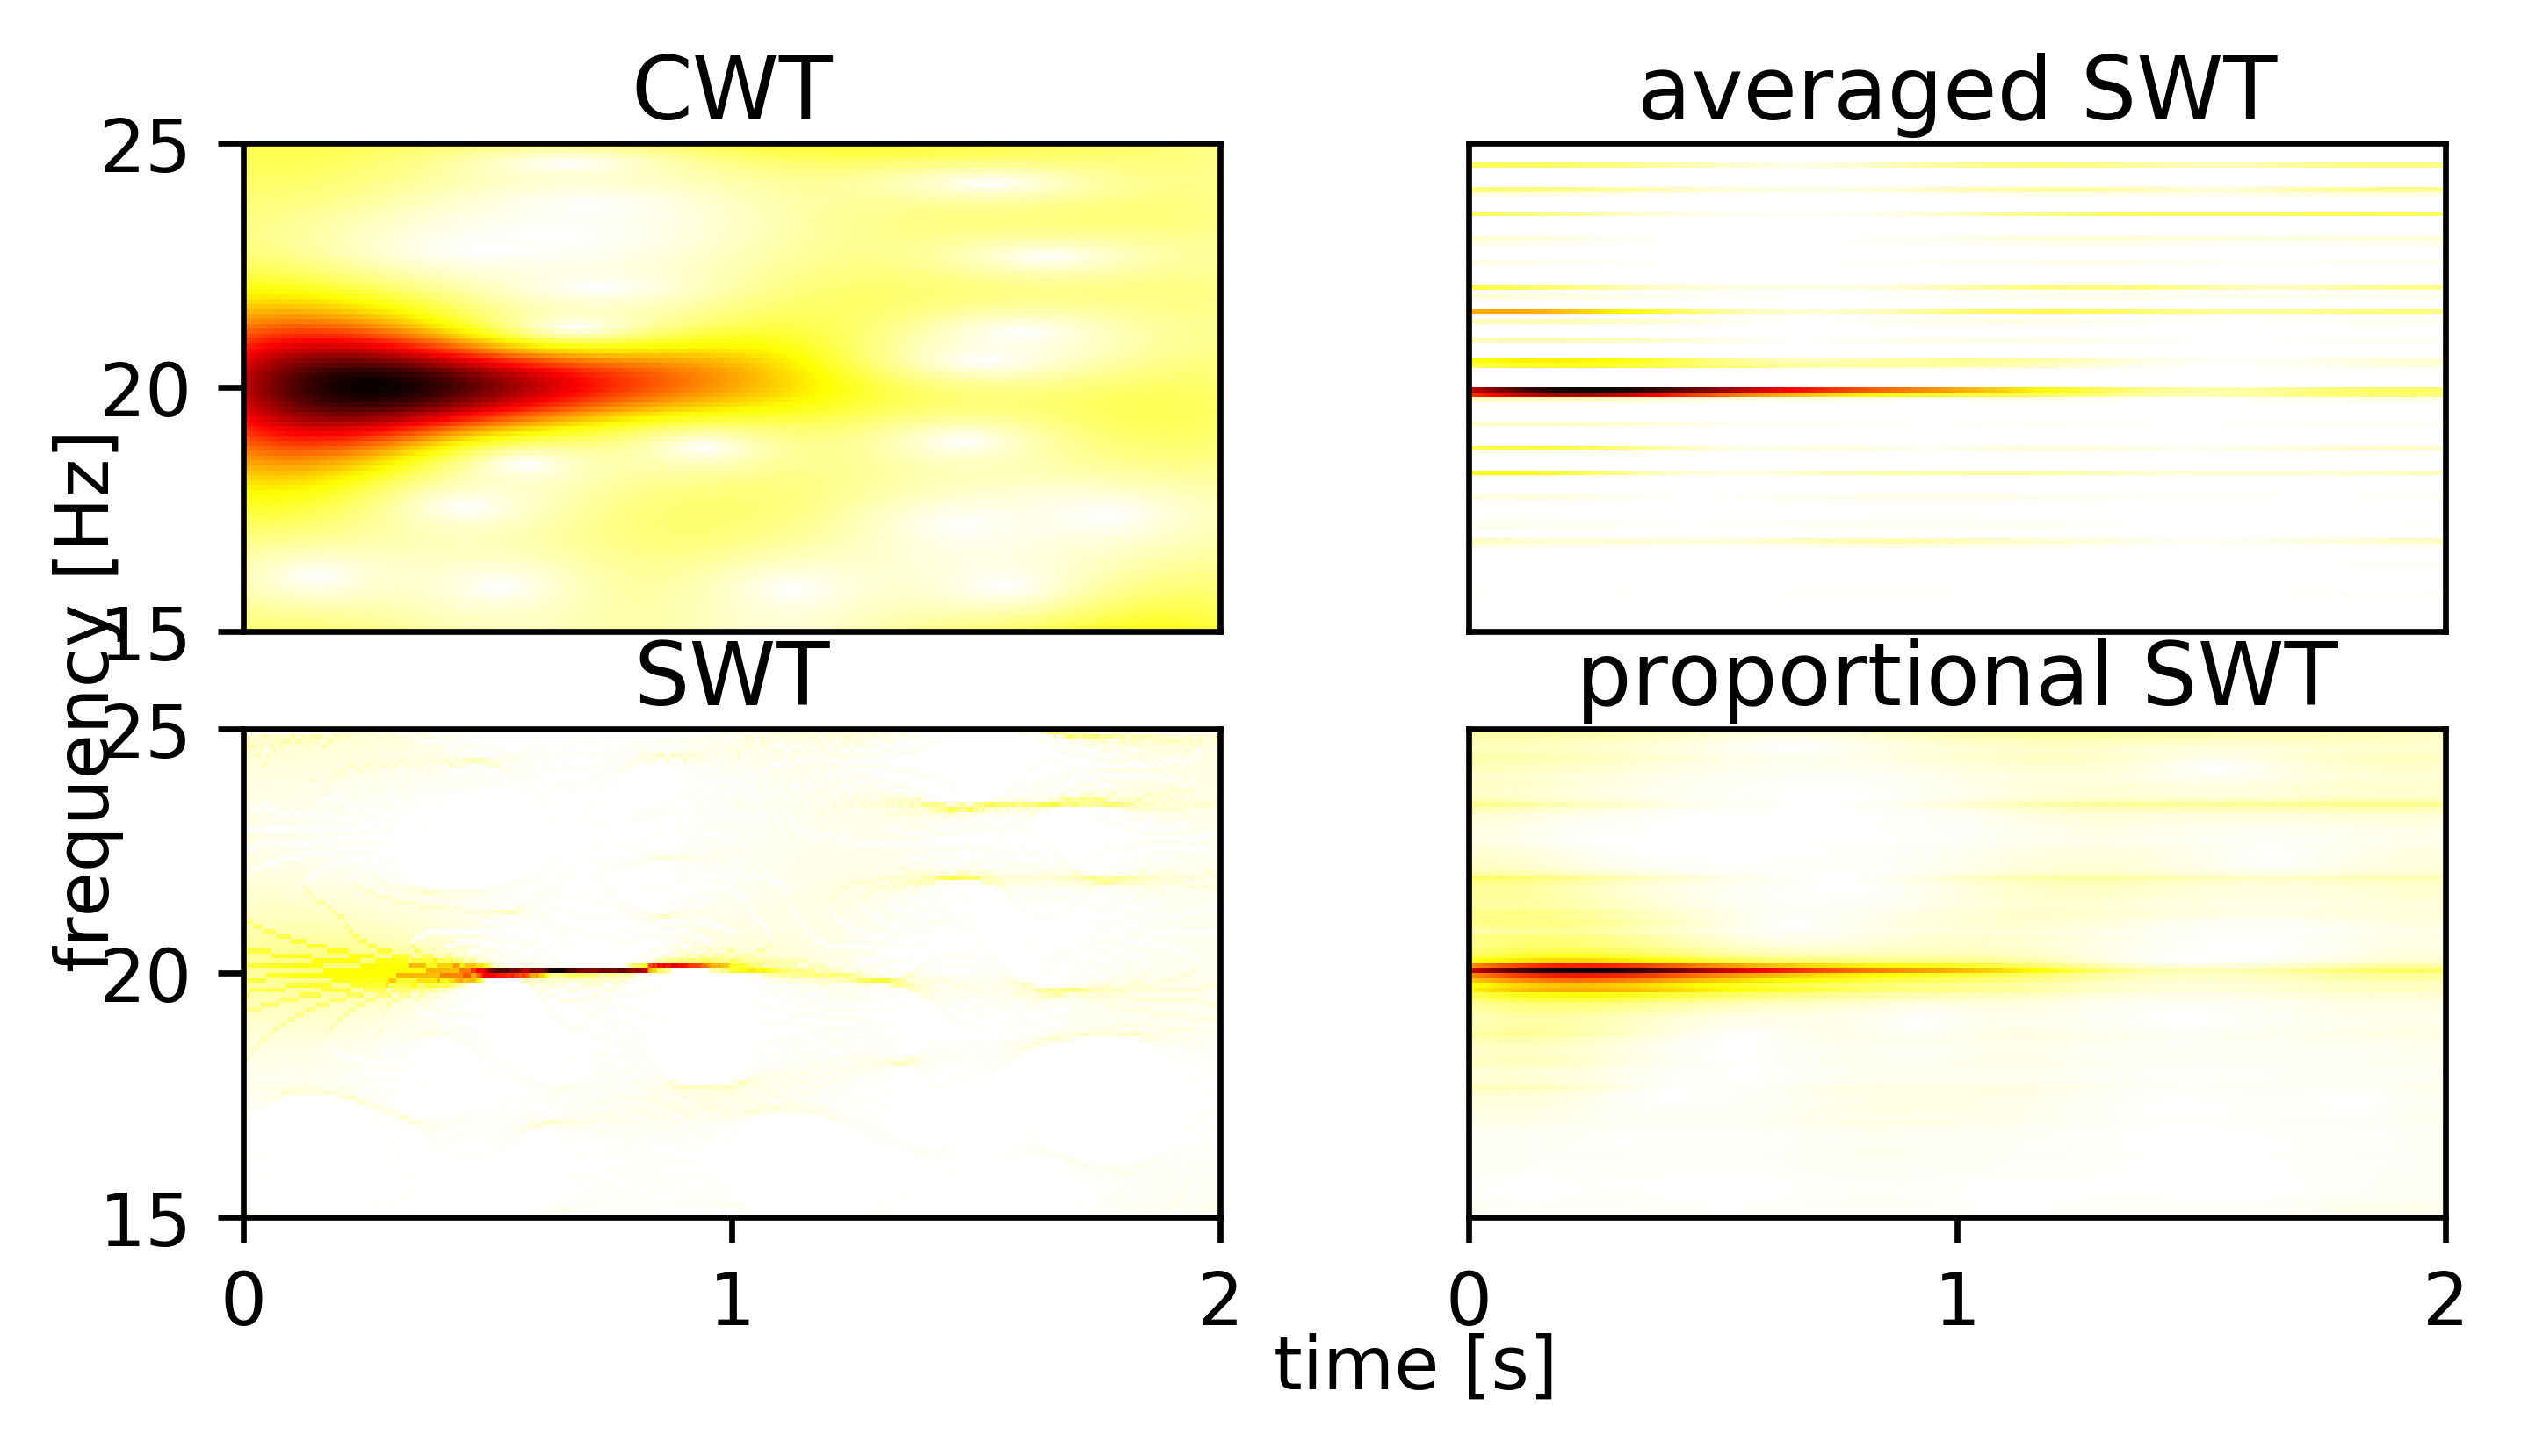

In [18]:
plt.figure(figsize=(5.5,2.7),dpi=600)

plt.subplot(2,2,1)
plt.imshow(abs(CWT),aspect=0.1,cmap='hot_r').set_extent([0,2,15,25])
plt.xticks([])
plt.title('CWT',y=0.96)

plt.subplot(2,2,3)
plt.imshow(abs(SWT),aspect=0.1,cmap='hot_r').set_extent([0,2,15,25])
plt.title('SWT',y=0.96)
plt.xticks([0,1,2])

plt.subplot(2,2,2)
plt.imshow(abs(SWTavg),aspect=0.1,cmap='hot_r').set_extent([0,2,15,25])
plt.yticks([])
plt.xticks([])
plt.title('averaged SWT',y=0.96)

plt.subplot(2,2,4)
plt.imshow(abs(SWTprop),aspect=0.1,cmap='hot_r').set_extent([0,2,15,25])
plt.yticks([])
plt.xticks([0,1,2])
plt.title('proportional SWT',y=0.96)

plt.text(-0.4,11.5,'time [s]')
plt.text(-2.9,30,'frequency [Hz]',rotation='vertical')